## Neural Networks
Implementing Neural Nets using python for recognise digits.

### We'll be using 3-layer neural net to recognise digits.

In [1]:
from matplotlib.colors import NoNorm
from numpy.random import RandomState
from scipy.io import loadmat

import matplotlib.pyplot as plt
import numpy as np


prng = RandomState(10)

### Load Data

In [2]:
data = loadmat('data/ex3data1.mat')

weights = loadmat('data/ex3weights.mat')

theta1, theta2 = weights['Theta1'], weights['Theta2']

X = data['X']
y = data['y']


### Plot Data

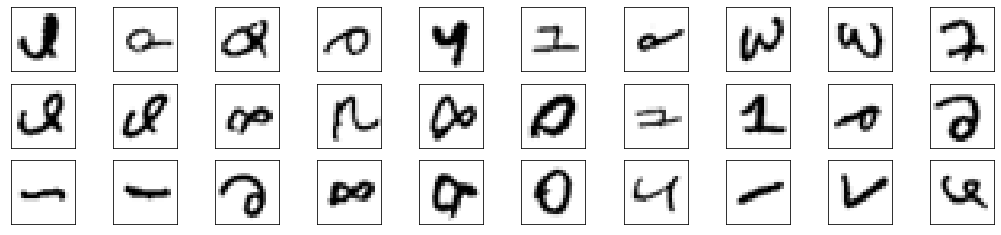

In [3]:
def plot_images(X):
    """
    Randomly picks 15 images from the dataset and plots them.
    """
    fig, axs = plt.subplots(3, 10, figsize=(18, 4))

    for row in range(axs.shape[0]):
        for col in range(axs.shape[1]):
            r = prng.randint(1, 5001)
            image_array = X[r].reshape(20, 20)
            ax = axs[row, col]
            ax.imshow(image_array, cmap='binary', norm=NoNorm())

            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
plot_images(X)

### Feedforward Propogation Algorithm

Assuming that we've trained the model and have all the weights.

<img src="./images/ex3-neural-network-model.png" width="400"/>

In [4]:
def sigmoid_function(z):
    """
    Applies sigmoid function to a float or an array of floats.
    
    Params:
        z (float or array)
    """
    return 1/(1+(np.exp(-z)))


def add_ones(X):
    result = X.copy()
    m, n = X.shape
    result = np.append(np.ones((m, 1)), result, axis=1)
    return result



In [5]:
X_ones = add_ones(X)

In [6]:
X_ones.shape

(5000, 401)

In [7]:
theta1.shape

(25, 401)

In [8]:
theta2.shape

(10, 26)

In [9]:
# Calculate the hidden layer (5000 x 26)
hidden_layer = X_ones @ theta1.T
hidden_layer = sigmoid_function(hidden_layer)
hidden_layer_ones = add_ones(hidden_layer)

In [10]:
hidden_layer_ones.shape

(5000, 26)

In [11]:
# Calculate the output layer (5000 x 10)
output_layer = hidden_layer_ones @ theta2.T
output_layer = sigmoid_function(output_layer)

In [12]:
output_layer.shape

(5000, 10)

In [13]:
# Get the index of the max values in each row
y_pred = output_layer.argmax(axis=1)

In [14]:
# labels in y are from 1-10, so +1 to match the labels.
y_pred += 1

In [15]:
accuracy = sum(y_pred == y[:, 0])/y.shape[0]

In [16]:
accuracy

0.9752

### Backpropogation Algorithm

..